In [1]:
import sympy as sy
import itikz
import itikz.nicematrix as nM

# Question 5 (10pts)

$A = \begin{pmatrix}-1&4&4 \\4&-1&-4 \\ -4&4&7 \end{pmatrix}$ is known to have an eigenvalue $\lambda_1 = -1$

Find the similarity transform that diagonalizes the matrix (provided it exists)

----

#### **Step 1: Eigenvalues**

We know $p(\lambda) = -( \lambda - \lambda_1 ) \left( \lambda^2 - (tr A - \lambda_1) \lambda + \frac{det(A)}{\lambda_1} \right)\quad$ and $\;\;\lambda_1 = -1$

* $tr(A) = 7 -1 -1 = 5 \qquad\qquad\qquad\qquad \Rightarrow tr( A ) -\lambda_1 = 6$
* $det(A) = (-1)(15)\frac{3}{5} = -9$ (using GE below) $\;\;\; \Rightarrow \frac{det(A)}{\lambda_1} = 9$

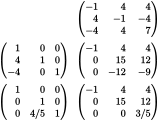

In [9]:
A  = sy.Matrix([[-1,4,4], [4,-1,-4],[-4,4,7]])
E1 = sy.Matrix([[1,0,0],[4,1,0],[-4,0,1]]); A1 = E1 @ A
E2 = sy.Matrix([[1,0,0],[0,1,0],[0,sy.Rational(4,5),1]]); A2 = E2 @ A1
h,m = nM.ge( [[None, A],[E1,A1],[E2,A2]])
h

$p(\lambda) = -(\lambda+1)(\lambda^2 - 6\lambda +9) \Leftrightarrow \boxed{\lambda=-1,3,3}$

#### **Step 2: Eigenvectors**

##### Case **$\lambda=3$**

This case determines whether $A$ is diagonalizable. We need geometric multiplicity $m_g = 2$

$\quad A - 3I = \begin{pmatrix} -4 & 4 & 4\\4 & -4 & -4\\-4 & 4 & 4 \end{pmatrix} \sim 
\begin{pmatrix} -1 & 1 & 1\\0 & 0 & 0\\0 & 0 & 0 \end{pmatrix} $

We see two missing pivots: $A$ is diagonalizable.
    
$\quad$ By inspection $basis \mathscr{N}(A-3I) \ =\ \left\{\; \begin{pmatrix}1\\1\\0\end{pmatrix},\ 
                                                   \begin{pmatrix}1\\0\\1\end{pmatrix} \; \right\}$

##### Case **$\lambda=-1$**

$\quad A + I = \begin{pmatrix} 0 & 4 & 4\\4 & 0 & -4\\-4 & 4 & 8 \end{pmatrix} \sim 
\begin{pmatrix} 1 & 0 & -1\\0 & 1 & 1\\-1 & 1 & 2 \end{pmatrix} 
 \sim 
\begin{pmatrix} 1 & 0 & -1\\0 & 1 & 1\\0 & 0 & 0 \end{pmatrix}
$

$\quad$ By inspection $basis \mathscr{N}(A-3I) \ =\ \left\{\;
            \begin{pmatrix}1\\-1\\1\end{pmatrix} \; \right\}$

##### **Check**

We could just verify $A x = \lambda x$ for each eigenpair.
<br>$\quad$ Let's use sympy instead:

In [28]:
for e,ma,basis in sy.Matrix.eigenvects(A):
    print( "Case")
    print(".  Eigenvalue:", e)
    print(".  ma:        ", ma)
    print(".  Basis:")
    for v in basis:
        print( ".  .  ", v.transpose(), end=", ")
    print()

Case
.  Eigenvalue: -1
.  ma:         1
.  Basis:
.  .   Matrix([[1, -1, 1]]), 
Case
.  Eigenvalue: 3
.  ma:         2
.  Basis:
.  .   Matrix([[1, 1, 0]]), .  .   Matrix([[1, 0, 1]]), 


#### **Eigendecomposition**

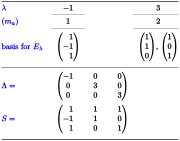

In [31]:
E = nM.EigenProblemTable( {
        'lambda': [-1,  3],
        'ma':     [1,   2],
        'evecs':  [[sy.Matrix([1, -1, 1])],
                   [sy.Matrix([ 1, 1, 0]), sy.Matrix([ 1, 0, 1])]],
        },  formater=sy.latex )
ep_code = E.nm_latex_doc(case='S', formater=str, mmS=9, mmLambda=9, fig_scale=0.8)

h = itikz.fetch_or_compile_svg(
        ep_code, prefix='ep_', working_dir="tmp", debug=False,
        **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
        nexec=1, keep_file="tmp/ep" )
h

The desired similarity transformation is given by $\Lambda = S^{-1}\ A\ S$